## Lead Scoring Case Study
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.


The company requires to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

Data
Dataset has been provided with a leads from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as  null value.
nings that you gathered.one.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy, pandas, matlab and seaborn libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_rows",None)        # used to display all the rows
pd.set_option("display.max_columns",None)     # used to display all the columns

In [3]:
# Importing the dataset and displaying first 5 records

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the dataset

df.shape

(9240, 37)

In [5]:
# Replacing 'Select' with NaN in the specified columns as it is as good as null value

varlist_select =  ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

df[varlist_select] = df[varlist_select].replace('Select', np.nan)

In [6]:
# Checking the columns with percentage of null values in descending order

round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending=False).head(15)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
dtype: float64

In [7]:
# Copying the data frame
ndf = df.copy()

In [8]:
# Dropping the columns where % of missing values are more than 40%

for i in ndf.columns[2:]:
    f = round(ndf[i].isnull().sum()/ len(ndf) *100,2)
    if f >40:
        ndf.drop(columns = i, axis = 1,inplace = True)

In [9]:
ndf.shape

(9240, 30)

In [10]:
# Dropping columns whose normalized value greater than 90%

for i in ndf.columns[2:]:
    x = ndf[i].value_counts(normalize =True)
    if x.iloc[0]>.90:
        ndf.drop(i,axis = 1, inplace = True)

In [11]:
#dropping unwanted columns

ndf.drop(['Lead Number','Prospect ID'], axis = 1, inplace = True)

In [12]:
# Checking the shape of the dataset after dropping the irrelevant columns

ndf.shape

(9240, 13)

In [13]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   Specialization                          5860 non-null   object 
 8   What is your current occupation         6550 non-null   object 
 9   Tags                                    5887 non-null   object 
 10  City                                    5571 non-null   obje

In [14]:
# Checking the number of missing value in the remaining columns

for i in ndf.columns[2:]:
    s= ndf[i].isnull().sum()
    if  s != 0:
      print(i,s, '\n')


TotalVisits 137 

Page Views Per Visit 137 

Last Activity 103 

Specialization 3380 

What is your current occupation 2690 

Tags 3353 

City 3669 



In [15]:
#1 Missing values imputation 

null_fill = ['Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City']

for i in null_fill:
    ndf[i] = ndf[i].fillna('UNKNOWN')


#2 TotalVisits - replacing nan values with median
ndf['TotalVisits'] = ndf['TotalVisits'].fillna(ndf['TotalVisits'].median())

#3 Page Views Per Visit -  replacing nan values with median
ndf['Page Views Per Visit'] = ndf['Page Views Per Visit'].fillna(ndf['Page Views Per Visit'].median())


In [16]:
# Outlier Analysis 

ndf.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
Tags                                       object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [17]:
#1 Total Visits

ndf['TotalVisits'].describe(percentiles = [0.05, 0.25,0.50,0.75, 0.90,0.95,0.99 ] )

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

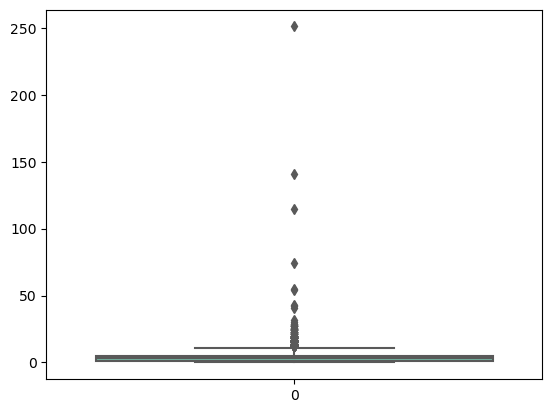

In [18]:
sns.boxplot(ndf['TotalVisits'],orient='vert',palette='Set2')
plt.show()

In [19]:
# Calculate the 5th and 95th percentiles
lower_percentile = np.percentile(ndf['TotalVisits'], 5)
upper_percentile = np.percentile(ndf['TotalVisits'], 95)

#Capping the values outside the 5st and 95th percentiles
ndf['TotalVisits'] = ndf['TotalVisits'].apply(lambda x: max(min(x, upper_percentile), lower_percentile))

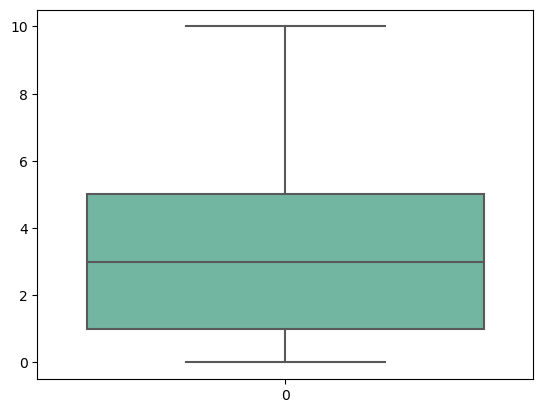

In [20]:
# Plotting the box plot for column "TotalVisits"

sns.boxplot(ndf['TotalVisits'],orient='vert',palette='Set2')
plt.show()

In [21]:
ndf['TotalVisits'].describe()

count    9240.000000
mean        3.179221
std         2.761219
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max        10.000000
Name: TotalVisits, dtype: float64

In [22]:
#2 Checking the percentile details of column "Total Time Spent on Website"

ndf['Total Time Spent on Website'].describe(percentiles = [0.05, 0.25,0.50,0.75, 0.90,0.95,0.99 ])

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
5%          0.000000
25%        12.000000
50%       248.000000
75%       936.000000
90%      1380.000000
95%      1562.000000
99%      1840.610000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

<Axes: >

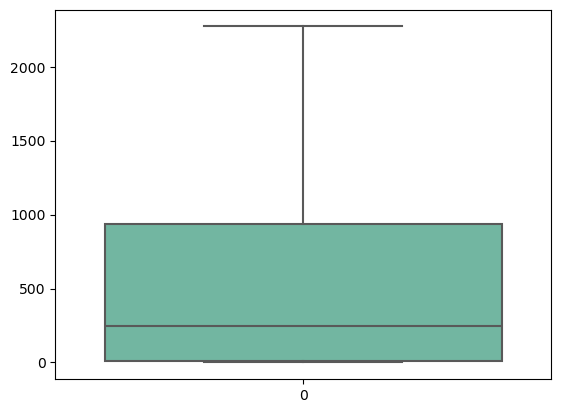

In [23]:
# Plotting the boxplot for "Total Time Spent on Website"

sns.boxplot(ndf['Total Time Spent on Website'],orient='vert',palette='Set2')

In [24]:
# Percentile details of column "Page Views Per Visit"
ndf['Page Views Per Visit'].describe(percentiles = [0.05, 0.25,0.50,0.75, 0.90,0.95,0.99 ])

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: >

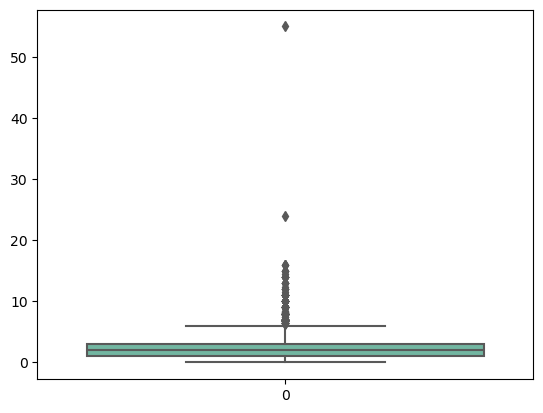

In [25]:
# Plotting boxplot for column "Page Views Per Visit"

sns.boxplot(ndf['Page Views Per Visit'],orient='vert',palette='Set2')

In [26]:
# Calculate the 5th and 95th percentiles for "Page Views Per Visit"

lower_percentile = np.percentile(ndf['Page Views Per Visit'], 5)
upper_percentile = np.percentile(ndf['Page Views Per Visit'], 95)

#Cap values outside the 5st and 95th percentiles
ndf['Page Views Per Visit'] = ndf['Page Views Per Visit'].apply(lambda x: max(min(x, upper_percentile), lower_percentile))

<Axes: >

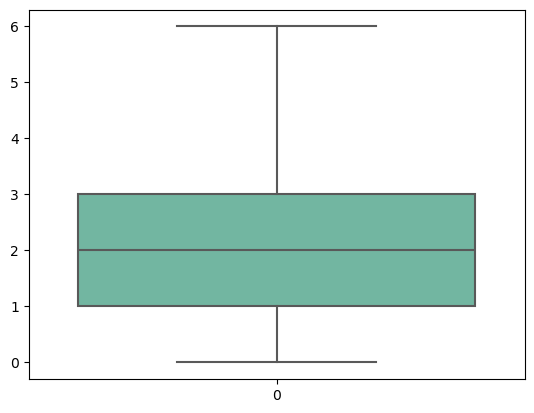

In [27]:
# Plotting boxplot for "Page Views Per Visit" after adjusting the outliers

sns.boxplot(ndf['Page Views Per Visit'],orient='vert',palette='Set2')

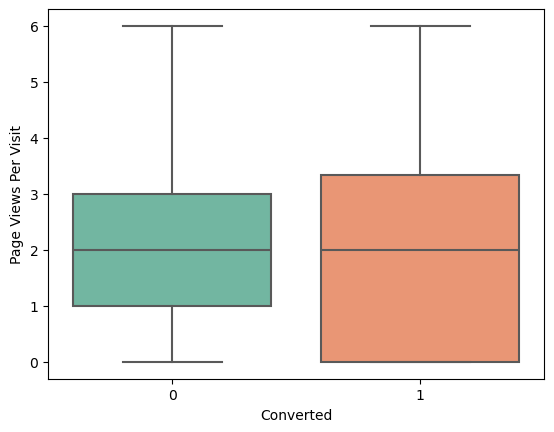

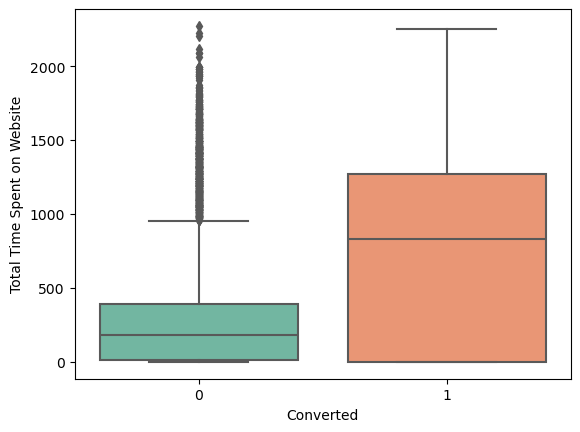

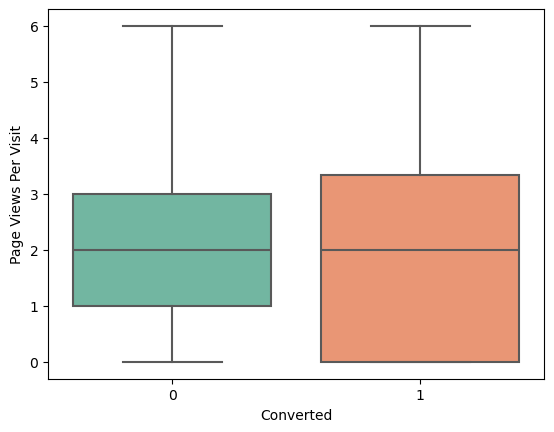

In [28]:
#EDA
#Univariate and Bivariate Analysis 

y_var = ['Page Views Per Visit', 'Total Time Spent on Website', 'Page Views Per Visit']

for i in y_var:
    sns.boxplot(y = ndf[i], x = ndf['Converted'], data = ndf,orient='vert',palette='Set2')
    plt.show()


In [29]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [30]:
# Merging the duplicate values
ndf['Lead Source'] = ndf['Lead Source'].replace('google', 'Google')

# Replacing negligible values with UNKNOWN 
ndf['Lead Source'] = ndf['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM'], 'UNKNOWN')

ndf['Last Activity'] = ndf['Last Activity'].replace(['Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'UNKNOWN')

ndf['Tags']= ndf['Tags'].replace(['Ringing','Busy','Lost to EINS', 'Already a student','switched off', 'opp hangup', 'wrong number given', 'invalid number', 'Diploma holder (Not Eligible)','switched off','Not doing further education','Interested  in full time MBA','University not recognized', 'Recognition issue (DEC approval)', 'Shall take in the next coming month','Lateral student','Lost to Others','Still Thinking','in touch with EINS','number not provided','Want to take admission but has financial problems','In confusion whether part time or DLP','Interested in Next batch' ],'UNKNOWN')

ndf['City'] = ndf['City'].replace(['Other Metro Cities','Tier II Cities'],'Other Cities')

#grouping categories under other whose value falls below 10

rare_categories = ndf['Last Notable Activity'].value_counts()[ndf['Last Notable Activity'].value_counts() < 10].index
ndf['Last Notable Activity'] = ndf['Last Notable Activity'].replace(rare_categories, 'Others')

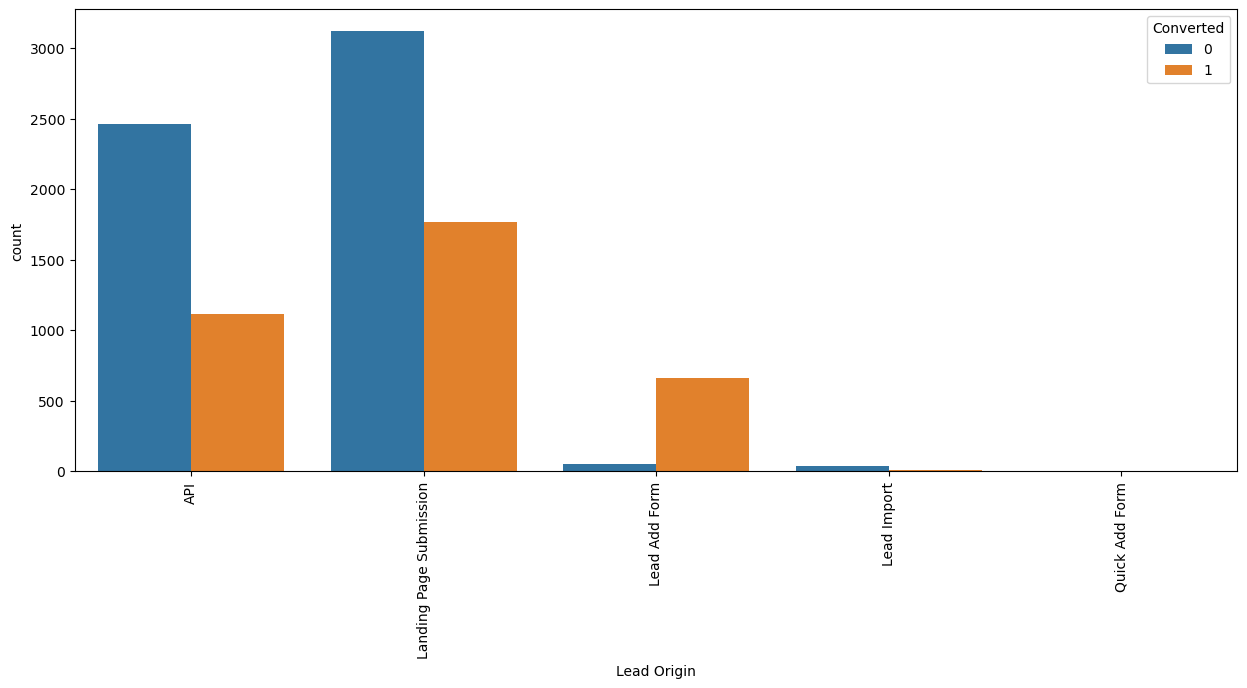

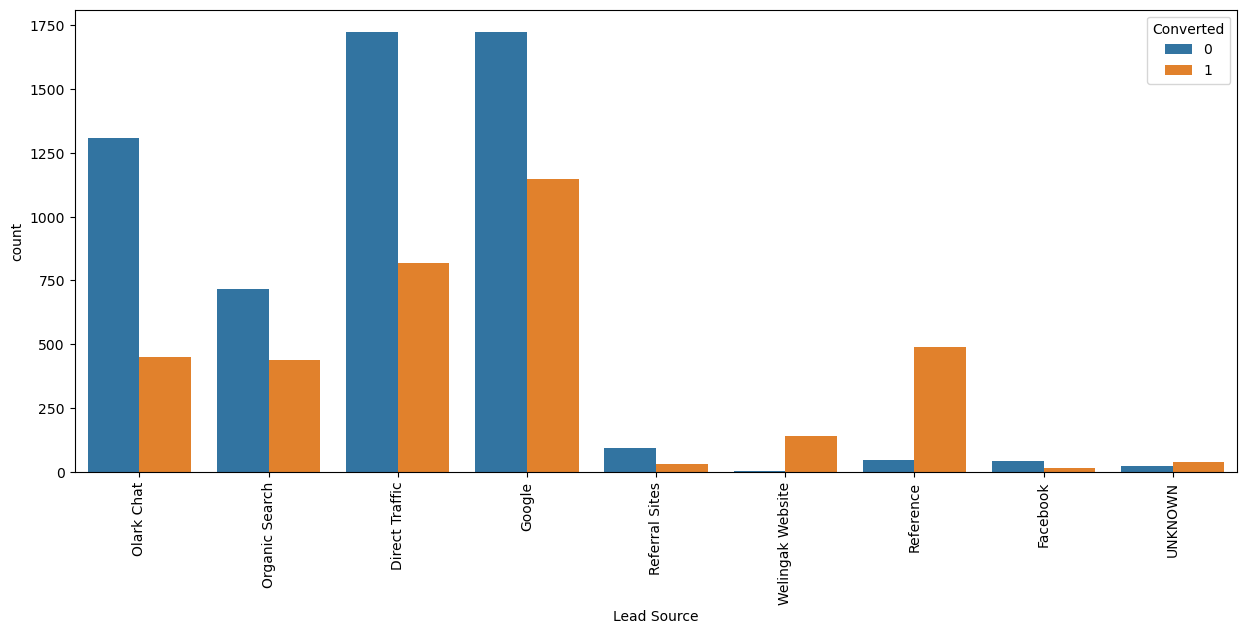

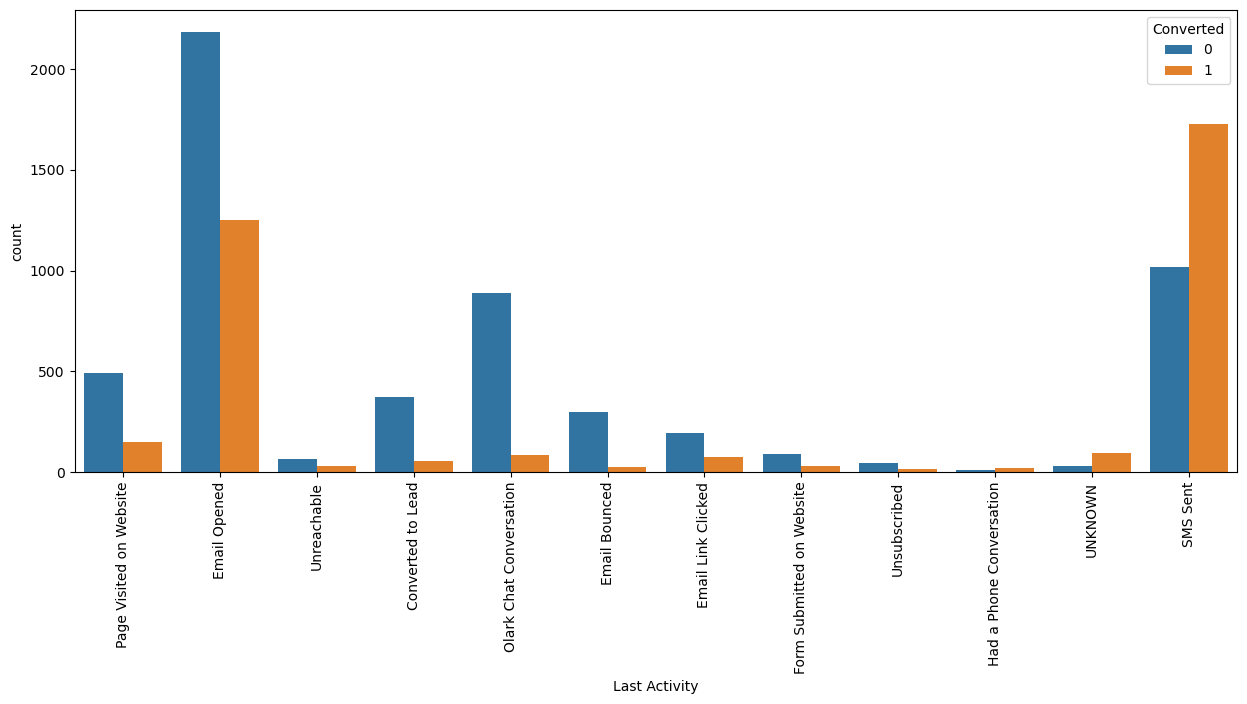

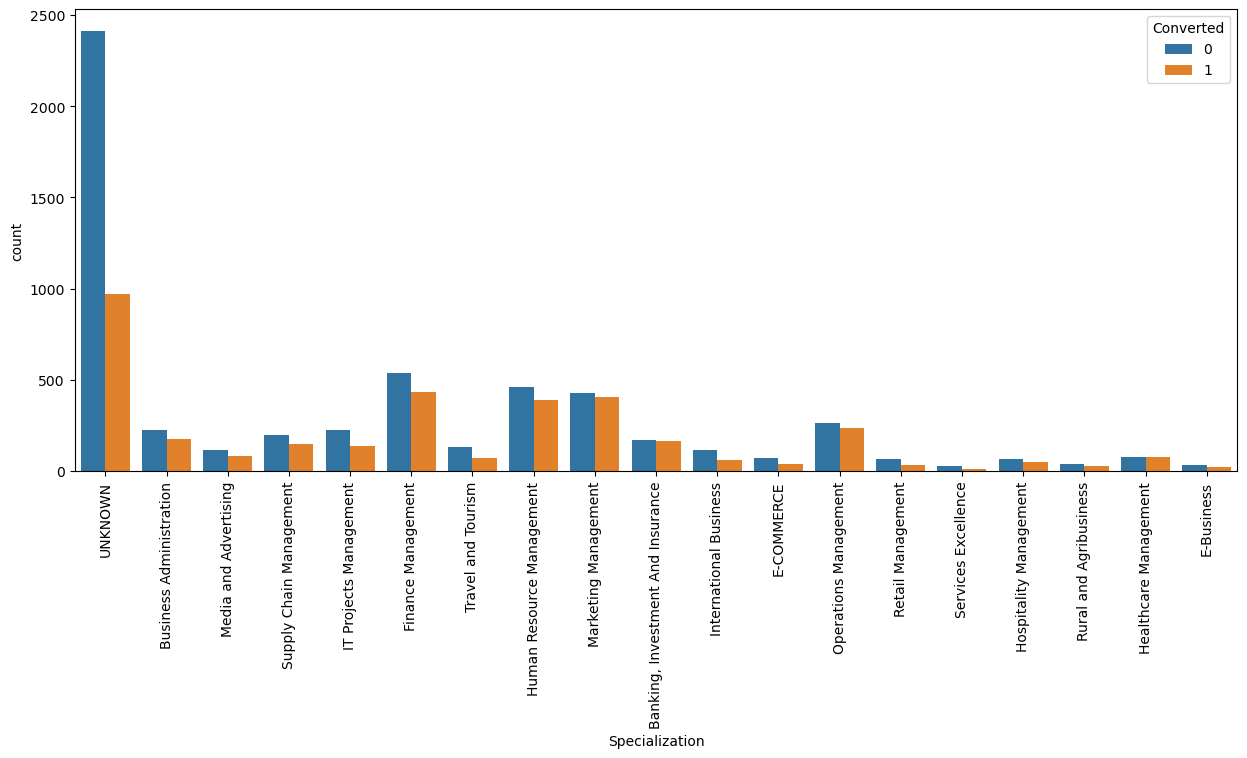

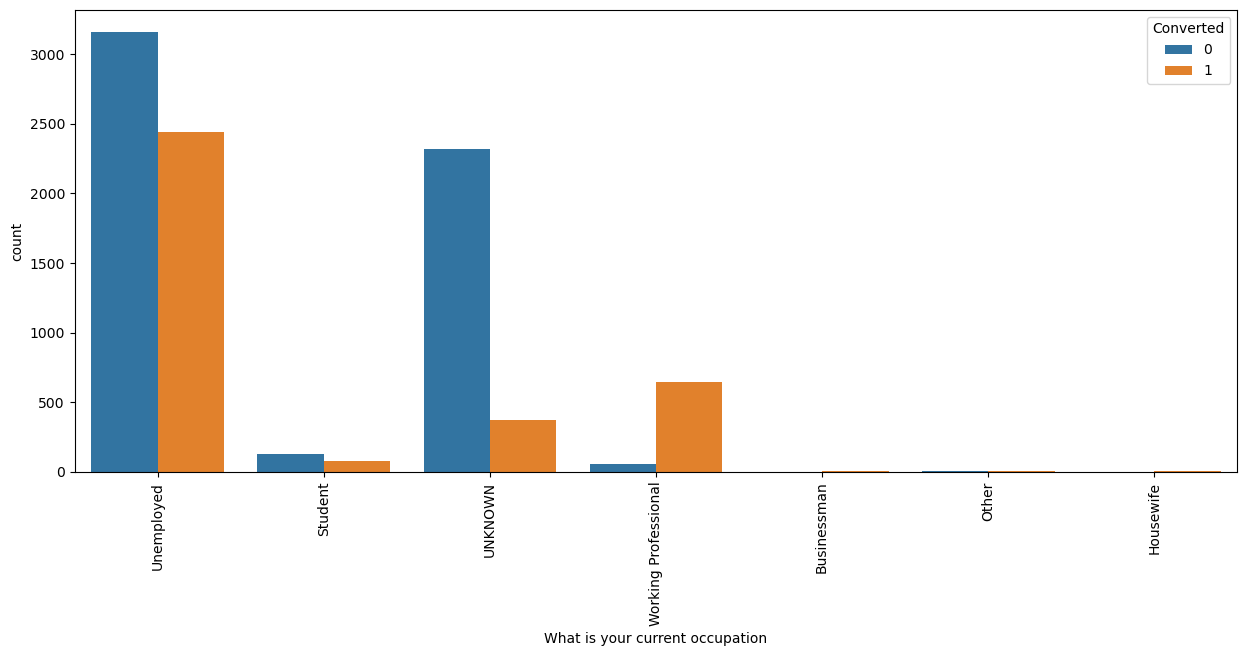

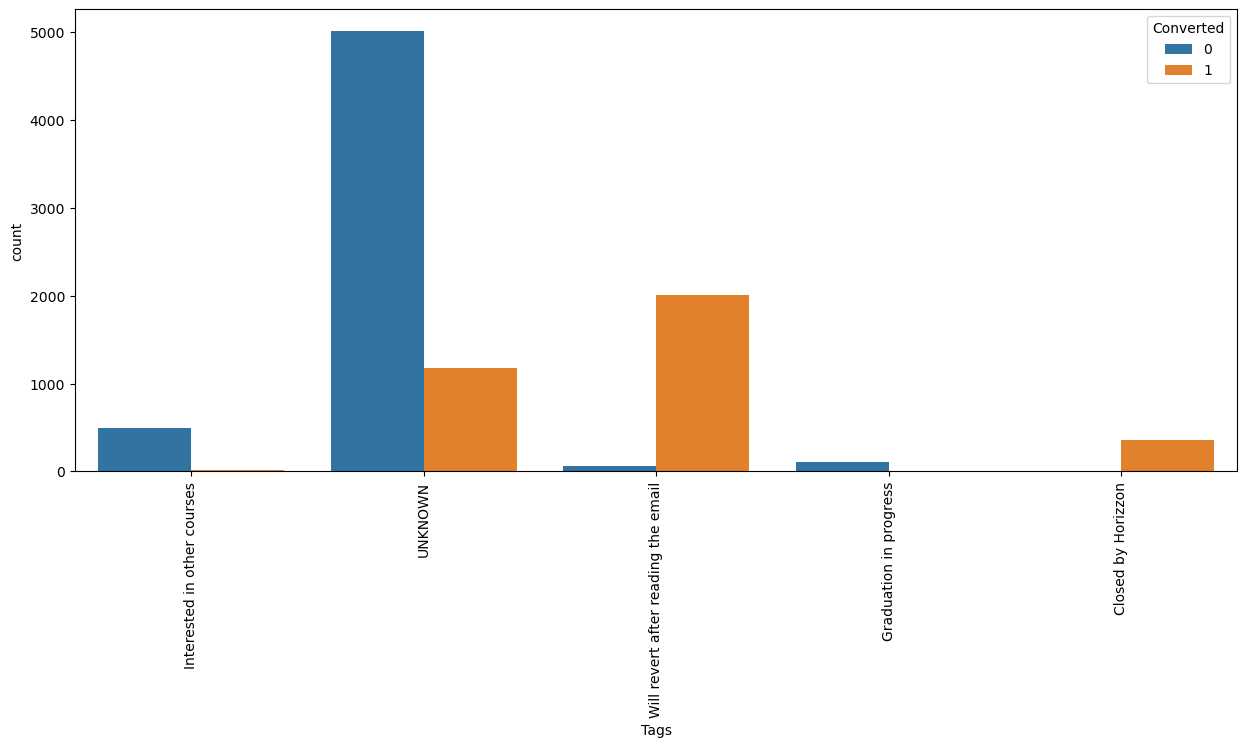

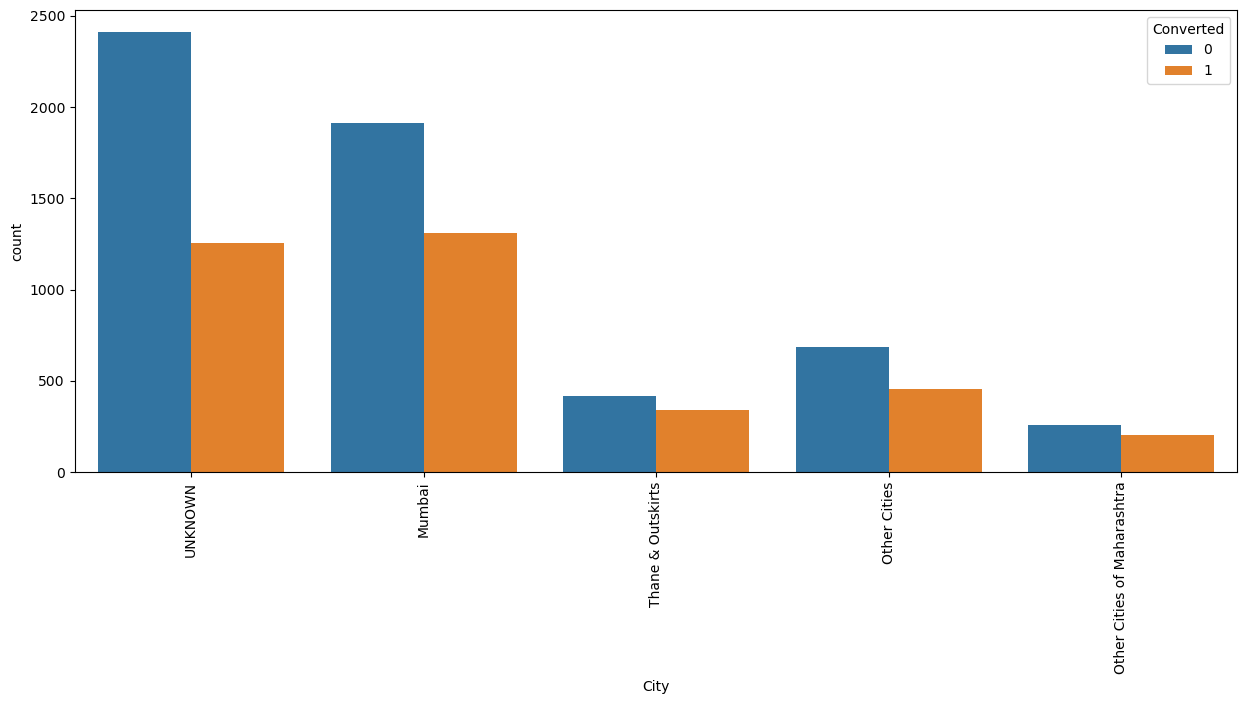

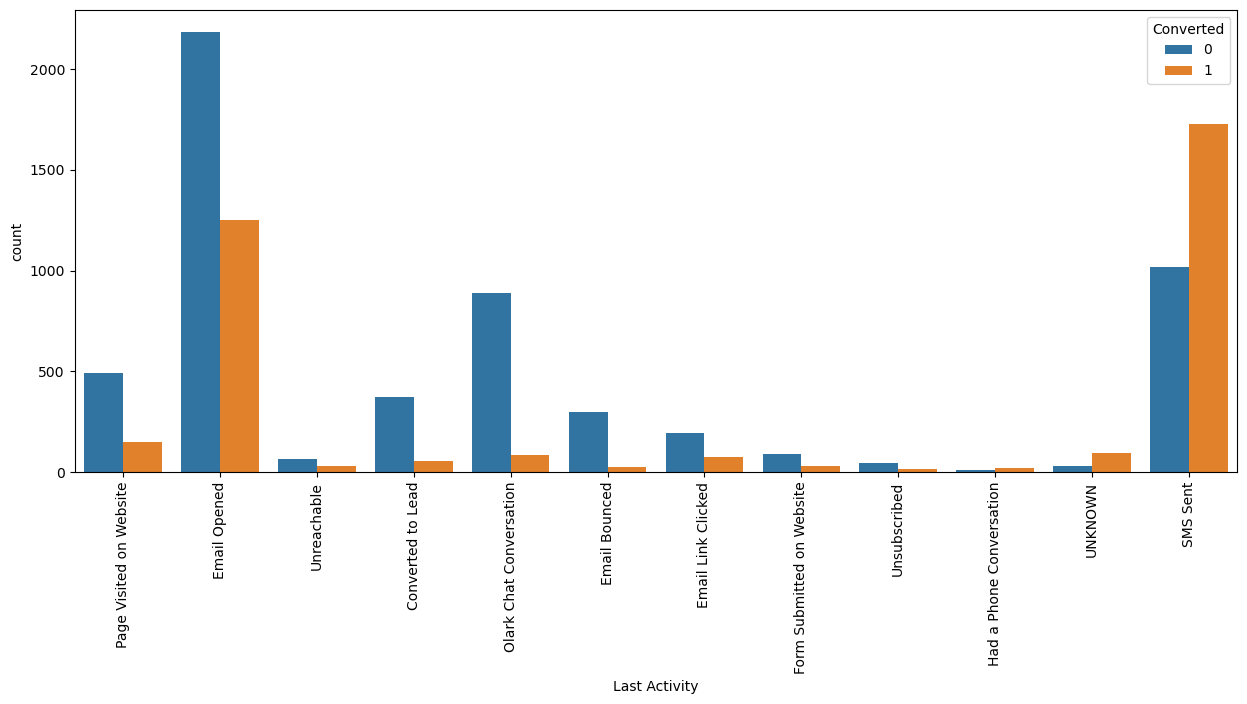

In [31]:
# Convert 'Converted' column to a categorical type
ndf['Converted'] = ndf['Converted'].astype(str)

cat = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags','City', 'Last Activity']

for i in cat:
    plt.figure(figsize=(15, 6))
    sns.countplot(x=i, hue='Converted', data=ndf)
    plt.xticks(rotation=90)
    plt.show()

ndf['Converted'] = ndf['Converted'].astype(int)

In [32]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int32  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   Tags                                    9240 non-null   object 
 10  City                                    9240 non-null   obje

In [33]:
ndf['A free copy of Mastering The Interview'].value_counts(normalize = True)

A free copy of Mastering The Interview
No     0.687446
Yes    0.312554
Name: proportion, dtype: float64

In [34]:
# Dropping the column as % of conversion in both the cases are almost similar

ndf.drop('A free copy of Mastering The Interview',inplace = True, axis = 1)

In [35]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int32  
 3   TotalVisits                      9240 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9240 non-null   float64
 6   Last Activity                    9240 non-null   object 
 7   Specialization                   9240 non-null   object 
 8   What is your current occupation  9240 non-null   object 
 9   Tags                             9240 non-null   object 
 10  City                             9240 non-null   object 
 11  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int32

In [36]:
#Final Columns
ndf.shape

(9240, 12)

In [37]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9240 non-null   object 
 1   Lead Source                      9240 non-null   object 
 2   Converted                        9240 non-null   int32  
 3   TotalVisits                      9240 non-null   float64
 4   Total Time Spent on Website      9240 non-null   int64  
 5   Page Views Per Visit             9240 non-null   float64
 6   Last Activity                    9240 non-null   object 
 7   Specialization                   9240 non-null   object 
 8   What is your current occupation  9240 non-null   object 
 9   Tags                             9240 non-null   object 
 10  City                             9240 non-null   object 
 11  Last Notable Activity            9240 non-null   object 
dtypes: float64(2), int32

In [38]:
# Creating Dummy variables 

object_columns = ndf.select_dtypes(include='object').columns.tolist()    
print(object_columns)   
dummies = pd.get_dummies(ndf[object_columns],drop_first=True)


['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


In [39]:
dummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_UNKNOWN,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_UNKNOWN,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UNKNOWN,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UNKNOWN,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Graduation in progress,Tags_Interested in other courses,Tags_UNKNOWN,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,City_UNKNOWN,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,Fal

In [40]:
# concatenating dummies to ndf
ndf = pd.concat([ndf,dummies],axis = 1)
ndf.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_UNKNOWN,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_UNKNOWN,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UNKNOWN,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UNKNOWN,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Graduation in progress,Tags_Interested in other courses,Tags_UNKNOWN,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,City_UNKNOWN,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,UNKNOWN,Unemployed,Interested in other courses,UNKNOWN,Modified,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False
1,API,Organic Search,0,5.0,674,2.5,Email Opened,UNKNOWN,Unemployed,UNKNOWN,UNKNOWN,Email Opened,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Email Opened,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,UNKNOWN,Mumbai,Modified,True,False,False,False,False,False,False,False,False,False,Fals

In [41]:
# dropping the duplicate columns 

ndf.drop(object_columns, inplace =True, axis = 1)

In [42]:
ndf.shape

(9240, 69)

In [43]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int32  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   bool   
 5   Lead Origin_Lead Add Form                             9240 non-null   bool   
 6   Lead Origin_Lead Import                               9240 non-null   bool   
 7   Lead Origin_Quick Add Form                            9240 non-null   bool   
 8   Lead Source_Facebook                                  9240

In [44]:
for i in ndf.columns:
    if ndf[i].dtype == 'bool':
        ndf[i]=ndf[i].astype(int)

In [45]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 69 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9240 non-null   int32  
 1   TotalVisits                                           9240 non-null   float64
 2   Total Time Spent on Website                           9240 non-null   int64  
 3   Page Views Per Visit                                  9240 non-null   float64
 4   Lead Origin_Landing Page Submission                   9240 non-null   int32  
 5   Lead Origin_Lead Add Form                             9240 non-null   int32  
 6   Lead Origin_Lead Import                               9240 non-null   int32  
 7   Lead Origin_Quick Add Form                            9240 non-null   int32  
 8   Lead Source_Facebook                                  9240

In [46]:
#Test-Train Split
from sklearn.model_selection import train_test_split

In [47]:
# Putting feature variable to X
X = ndf.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_UNKNOWN,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_UNKNOWN,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UNKNOWN,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UNKNOWN,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Graduation in progress,Tags_Interested in other courses,Tags_UNKNOWN,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,City_UNKNOWN,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [48]:
# Assigning Target variable

y = ndf['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int32

Step 5: Feature Scaling

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_UNKNOWN,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_UNKNOWN,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_UNKNOWN,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_UNKNOWN,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Graduation in progress,Tags_Interested in other courses,Tags_UNKNOWN,Tags_Will revert after reading the email,City_Other Cities,City_Other Cities of Maharashtra,City_Thane & Outskirts,City_UNKNOWN,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
6795,0.299722,0.005716,-0.516439,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3516,0.662077,-0.691418,0.143543,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
8105,0.662077,1.365219,1.553761,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [52]:
# Checking the Conversion rate
Converted = round((sum(ndf['Converted'])/len(ndf['Converted'].index))*100,2)
Converted

38.54

Feature Selection Using RFE

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [54]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 20) 

# running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [55]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True, False, False, False, False])

In [56]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', False, 17),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 16),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 34),
 ('Lead Origin_Quick Add Form', False, 12),
 ('Lead Source_Facebook', False, 19),
 ('Lead Source_Google', False, 26),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 45),
 ('Lead Source_Reference', False, 11),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_UNKNOWN', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 27),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', True, 1),
 ('Last Activity_Had a Phone Conversation', False, 28),
 ('Last Activity_Olark Chat Conversation', False, 10),
 ('Last Activity_Page Visited on Website', False, 20),
 ('Last Activity_SMS Sent', True, 1),
 

In [57]:
#columns supported by rfe
cols = X_train.columns[rfe.support_]
cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_UNKNOWN', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management',
       'What is your current occupation_Working Professional',
       'Tags_Graduation in progress', 'Tags_Interested in other courses',
       'Tags_UNKNOWN', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others'],
      dtype='object')

Model Building

In [58]:
import statsmodels.api as sm

In [59]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1720.7
Date:                Tue, 21 Jan 2025   Deviance:                       3441.4
Time:                        21:10:43   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5495
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.9575      0.224     13.195      0.000       2.518       3.397
Total Time Spent on Website                              1.0339      0.049     21.067      0.000       0.938       1.130
Lead Origin_Landing Page Submission                     -0.7390      0.113     -6.538      0.000      -0.961      -0.517
Lead Origin_Lead Add Form                                1.0949      0.285      3.841      0.000       0.536       1.654
Lead Source_Olark Chat                                   0.9505      0.144      6.610      0.000       0.669       1.232
Lead Source_UNKNOWN                                      1.1446      0.517      2.215      0.027       0.132       2.158
Lead Source_Welingak Website                             4.5186      0.775      5.829      0.000       2.999       6.038
Last Activity_Email Bounced                             -0.6904      0.403     -1.713      0.087      -1.480       0.099
Last Activity_Email Opened                               1.2439      0.209      5.942      0.000       0.834       1.654
Last Activity_Form Submitted on Website                  1.0013      0.443      2.261      0.024       0.133       1.869
Last Activity_SMS Sent                                   1.7775      0.147     12.089      0.000       1.489       2.066
Specialization_Hospitality Management                   -0.8038      0.431     -1.865      0.062      -1.649       0.041
What is your current occupation_Working Professional     0.9607      0.304      3.162      0.002       0.365       1.556
Tags_Graduation in progress                             -5.0628      0.526     -9.632      0.000      -6.093      -4.033
Tags_Interested in other courses                        -6.4735      0.369    -17.557      0.000      -7.196      -5.751
Tags_UNKNOWN                                            -4.9420      0.177    -27.931      0.000      -5.289      -4.595
Last Notable Activity_Email Opened                      -0.9298      0.232     -4.008      0.000      -1.384      -0.475
Last Notable Activity_Had a Phone Conversation           3.2065      1.387      2.312      0.021       0.488       5.925
Last Notable Activity_Modified                          -1.0097      0.137     -7.389      0.000      -1.278      -0.742
Last Notable Activity_Olark Chat Conversation           -0.8386      0.401     -2.092      0.036      -1.624      -0.053
Last Notable Activity_Others                             2.0306      1.431      1.419      0.156      -0.774       4.835
========================================================================================================================
"""

In [60]:
#dropping column having high p value 
col1 = cols.drop('Last Notable Activity_Others')

Model -2


In [61]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1721.6
Date:                Tue, 21 Jan 2025   Deviance:                       3443.2
Time:                        21:10:43   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5493
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.9674      0.224     13.247      0.000       2.528       3.406
Total Time Spent on Website                              1.0329      0.049     21.057      0.000       0.937       1.129
Lead Origin_Landing Page Submission                     -0.7375      0.113     -6.527      0.000      -0.959      -0.516
Lead Origin_Lead Add Form                                1.0956      0.285      3.843      0.000       0.537       1.654
Lead Source_Olark Chat                                   0.9523      0.144      6.624      0.000       0.671       1.234
Lead Source_UNKNOWN                                      1.1450      0.517      2.216      0.027       0.132       2.158
Lead Source_Welingak Website                             4.5171      0.775      5.827      0.000       2.998       6.036
Last Activity_Email Bounced                             -0.6950      0.403     -1.725      0.084      -1.484       0.095
Last Activity_Email Opened                               1.2429      0.209      5.939      0.000       0.833       1.653
Last Activity_Form Submitted on Website                  1.0676      0.439      2.434      0.015       0.208       1.927
Last Activity_SMS Sent                                   1.7670      0.147     12.045      0.000       1.479       2.055
Specialization_Hospitality Management                   -0.8033      0.431     -1.863      0.062      -1.648       0.042
What is your current occupation_Working Professional     0.9617      0.303      3.169      0.002       0.367       1.556
Tags_Graduation in progress                             -5.0613      0.526     -9.631      0.000      -6.091      -4.031
Tags_Interested in other courses                        -6.4739      0.369    -17.562      0.000      -7.196      -5.751
Tags_UNKNOWN                                            -4.9399      0.177    -27.927      0.000      -5.287      -4.593
Last Notable Activity_Email Opened                      -0.9414      0.232     -4.060      0.000      -1.396      -0.487
Last Notable Activity_Had a Phone Conversation           3.1927      1.387      2.302      0.021       0.474       5.911
Last Notable Activity_Modified                          -1.0213      0.136     -7.484      0.000      -1.289      -0.754
Last Notable Activity_Olark Chat Conversation           -0.8519      0.401     -2.127      0.033      -1.637      -0.067
========================================================================================================================
"""

In [62]:
# dropping columns havin high p value 'Last Activity_Email Bounced'

col2 = col1.drop('Last Activity_Email Bounced')

Model- 3

In [63]:
X_train_sm = sm.add_constant(X_train[col2])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1723.3
Date:                Tue, 21 Jan 2025   Deviance:                       3446.5
Time:                        21:10:43   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5491
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.9203      0.223     13.125      0.000       2.484       3.356
Total Time Spent on Website                              1.0302      0.049     21.027      0.000       0.934       1.126
Lead Origin_Landing Page Submission                     -0.7419      0.113     -6.570      0.000      -0.963      -0.521
Lead Origin_Lead Add Form                                1.0853      0.286      3.800      0.000       0.525       1.645
Lead Source_Olark Chat                                   0.9550      0.144      6.643      0.000       0.673       1.237
Lead Source_UNKNOWN                                      1.0608      0.520      2.038      0.042       0.041       2.081
Lead Source_Welingak Website                             4.5139      0.775      5.824      0.000       2.995       6.033
Last Activity_Email Opened                               1.3064      0.207      6.310      0.000       0.901       1.712
Last Activity_Form Submitted on Website                  1.1328      0.438      2.588      0.010       0.275       1.991
Last Activity_SMS Sent                                   1.8329      0.143     12.807      0.000       1.552       2.113
Specialization_Hospitality Management                   -0.8128      0.431     -1.886      0.059      -1.658       0.032
What is your current occupation_Working Professional     0.9563      0.302      3.168      0.002       0.365       1.548
Tags_Graduation in progress                             -5.0628      0.526     -9.633      0.000      -6.093      -4.033
Tags_Interested in other courses                        -6.4890      0.369    -17.589      0.000      -7.212      -5.766
Tags_UNKNOWN                                            -4.9555      0.177    -27.981      0.000      -5.303      -4.608
Last Notable Activity_Email Opened                      -0.9408      0.232     -4.058      0.000      -1.395      -0.486
Last Notable Activity_Had a Phone Conversation           3.2578      1.387      2.349      0.019       0.539       5.976
Last Notable Activity_Modified                          -1.0212      0.136     -7.493      0.000      -1.288      -0.754
Last Notable Activity_Olark Chat Conversation           -0.7921      0.400     -1.982      0.047      -1.575      -0.009
========================================================================================================================
"""

In [64]:
#dropping columns havin high p value 'Specialization_Hospitality Management'

col3 = col2.drop('Specialization_Hospitality Management')

Model - 4

In [65]:
X_train_sm = sm.add_constant(X_train[col3])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1725.2
Date:                Tue, 21 Jan 2025   Deviance:                       3450.3
Time:                        21:10:44   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5488
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.9139      0.222     13.114      0.000       2.478       3.349
Total Time Spent on Website                              1.0242      0.049     20.993      0.000       0.929       1.120
Lead Origin_Landing Page Submission                     -0.7540      0.113     -6.687      0.000      -0.975      -0.533
Lead Origin_Lead Add Form                                1.0652      0.286      3.728      0.000       0.505       1.625
Lead Source_Olark Chat                                   0.9506      0.144      6.620      0.000       0.669       1.232
Lead Source_UNKNOWN                                      1.0760      0.520      2.069      0.039       0.057       2.095
Lead Source_Welingak Website                             4.5293      0.775      5.843      0.000       3.010       6.049
Last Activity_Email Opened                               1.3066      0.207      6.308      0.000       0.901       1.713
Last Activity_Form Submitted on Website                  1.1451      0.437      2.620      0.009       0.288       2.002
Last Activity_SMS Sent                                   1.8304      0.143     12.790      0.000       1.550       2.111
What is your current occupation_Working Professional     0.9607      0.302      3.183      0.001       0.369       1.552
Tags_Graduation in progress                             -5.0972      0.530     -9.621      0.000      -6.136      -4.059
Tags_Interested in other courses                        -6.5146      0.370    -17.601      0.000      -7.240      -5.789
Tags_UNKNOWN                                            -4.9467      0.176    -28.044      0.000      -5.292      -4.601
Last Notable Activity_Email Opened                      -0.9408      0.232     -4.058      0.000      -1.395      -0.486
Last Notable Activity_Had a Phone Conversation           3.2653      1.387      2.354      0.019       0.547       5.984
Last Notable Activity_Modified                          -1.0247      0.136     -7.520      0.000      -1.292      -0.758
Last Notable Activity_Olark Chat Conversation           -0.7892      0.399     -1.977      0.048      -1.572      -0.007
========================================================================================================================
"""

In [66]:
#dropping columns havin high p value 'Last Notable Activity_Olark Chat Conversation'
col4 = col3.drop('Last Notable Activity_Olark Chat Conversation')

Model- 5

In [67]:
X_train_sm = sm.add_constant(X_train[col4])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1727.4
Date:                Tue, 21 Jan 2025   Deviance:                       3454.7
Time:                        21:10:44   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5485
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.8170      0.217     12.973      0.000       2.391       3.243
Total Time Spent on Website                              1.0208      0.049     20.936      0.000       0.925       1.116
Lead Origin_Landing Page Submission                     -0.7490      0.113     -6.646      0.000      -0.970      -0.528
Lead Origin_Lead Add Form                                1.0613      0.285      3.718      0.000       0.502       1.621
Lead Source_Olark Chat                                   0.9193      0.143      6.431      0.000       0.639       1.199
Lead Source_UNKNOWN                                      1.0860      0.520      2.088      0.037       0.067       2.105
Lead Source_Welingak Website                             4.5436      0.776      5.858      0.000       3.023       6.064
Last Activity_Email Opened                               1.3493      0.207      6.515      0.000       0.943       1.755
Last Activity_Form Submitted on Website                  1.1856      0.437      2.714      0.007       0.329       2.042
Last Activity_SMS Sent                                   1.9256      0.137     14.088      0.000       1.658       2.193
What is your current occupation_Working Professional     0.9610      0.302      3.186      0.001       0.370       1.552
Tags_Graduation in progress                             -5.1230      0.530     -9.666      0.000      -6.162      -4.084
Tags_Interested in other courses                        -6.5154      0.370    -17.593      0.000      -7.241      -5.790
Tags_UNKNOWN                                            -4.9571      0.177    -28.063      0.000      -5.303      -4.611
Last Notable Activity_Email Opened                      -0.8714      0.230     -3.795      0.000      -1.321      -0.421
Last Notable Activity_Had a Phone Conversation           3.3658      1.387      2.427      0.015       0.648       6.083
Last Notable Activity_Modified                          -0.9536      0.132     -7.233      0.000      -1.212      -0.695
========================================================================================================================
"""

Model - 6

In [68]:
#dropping columns havin high p value 'Last Notable Activity_Olark Chat Conversation'
col5 = col4.drop('Lead Source_UNKNOWN')

In [69]:
X_train_sm = sm.add_constant(X_train[col5])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1729.4
Date:                Tue, 21 Jan 2025   Deviance:                       3458.8
Time:                        21:10:44   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5482
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.8028      0.216     12.956      0.000       2.379       3.227
Total Time Spent on Website                              1.0209      0.049     20.965      0.000       0.925       1.116
Lead Origin_Landing Page Submission                     -0.7457      0.113     -6.628      0.000      -0.966      -0.525
Lead Origin_Lead Add Form                                1.2172      0.279      4.362      0.000       0.670       1.764
Lead Source_Olark Chat                                   0.9137      0.143      6.401      0.000       0.634       1.193
Lead Source_Welingak Website                             4.3803      0.773      5.669      0.000       2.866       5.895
Last Activity_Email Opened                               1.3370      0.207      6.459      0.000       0.931       1.743
Last Activity_Form Submitted on Website                  1.1693      0.436      2.679      0.007       0.314       2.025
Last Activity_SMS Sent                                   1.9155      0.136     14.046      0.000       1.648       2.183
What is your current occupation_Working Professional     0.9367      0.301      3.108      0.002       0.346       1.527
Tags_Graduation in progress                             -5.1078      0.530     -9.644      0.000      -6.146      -4.070
Tags_Interested in other courses                        -6.5002      0.370    -17.581      0.000      -7.225      -5.776
Tags_UNKNOWN                                            -4.9330      0.176    -28.094      0.000      -5.277      -4.589
Last Notable Activity_Email Opened                      -0.8646      0.230     -3.767      0.000      -1.315      -0.415
Last Notable Activity_Had a Phone Conversation           3.3538      1.386      2.420      0.016       0.638       6.070
Last Notable Activity_Modified                          -0.9457      0.132     -7.191      0.000      -1.204      -0.688
========================================================================================================================
"""

In [70]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col5].columns
vif['VIF'] = [variance_inflation_factor(X_train[col5].values, i) for i in range(X_train[col5].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Email Opened,7.89
5,Last Activity_Email Opened,7.14
11,Tags_UNKNOWN,3.76
1,Lead Origin_Landing Page Submission,2.91
14,Last Notable Activity_Modified,2.62
7,Last Activity_SMS Sent,1.97
3,Lead Source_Olark Chat,1.79
2,Lead Origin_Lead Add Form,1.64
0,Total Time Spent on Website,1.30
10,Tags_Interested in other courses,1.27


In [71]:
#dropping high vif value 

col6 = col5.drop('Last Notable Activity_Email Opened')

Model - 7

In [72]:
X_train_sm = sm.add_constant(X_train[col6])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1736.2
Date:                Tue, 21 Jan 2025   Deviance:                       3472.5
Time:                        21:10:44   Pearson chi2:                 6.35e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5473
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    2.6490      0.213     12.427      0.000       2.231       3.067
Total Time Spent on Website                              1.0201      0.049     20.985      0.000       0.925       1.115
Lead Origin_Landing Page Submission                     -0.7469      0.112     -6.648      0.000      -0.967      -0.527
Lead Origin_Lead Add Form                                1.2121      0.277      4.369      0.000       0.668       1.756
Lead Source_Olark Chat                                   0.9286      0.143      6.512      0.000       0.649       1.208
Lead Source_Welingak Website                             4.3540      0.772      5.642      0.000       2.842       5.866
Last Activity_Email Opened                               0.7232      0.135      5.363      0.000       0.459       0.988
Last Activity_Form Submitted on Website                  1.0688      0.435      2.455      0.014       0.216       1.922
Last Activity_SMS Sent                                   2.0213      0.134     15.075      0.000       1.758       2.284
What is your current occupation_Working Professional     0.9479      0.305      3.109      0.002       0.350       1.546
Tags_Graduation in progress                             -5.0952      0.526     -9.688      0.000      -6.126      -4.064
Tags_Interested in other courses                        -6.4348      0.368    -17.473      0.000      -7.157      -5.713
Tags_UNKNOWN                                            -4.9435      0.175    -28.195      0.000      -5.287      -4.600
Last Notable Activity_Had a Phone Conversation           3.5185      1.386      2.539      0.011       0.803       6.234
Last Notable Activity_Modified                          -0.6844      0.110     -6.199      0.000      -0.901      -0.468
========================================================================================================================
"""

In [73]:
vif = pd.DataFrame()
vif['Features'] = X_train[col6].columns
vif['VIF'] = [variance_inflation_factor(X_train[col6].values, i) for i in range(X_train[col6].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_UNKNOWN,3.52
1,Lead Origin_Landing Page Submission,2.84
5,Last Activity_Email Opened,2.09
13,Last Notable Activity_Modified,1.94
7,Last Activity_SMS Sent,1.91
3,Lead Source_Olark Chat,1.77
2,Lead Origin_Lead Add Form,1.61
0,Total Time Spent on Website,1.29
4,Lead Source_Welingak Website,1.26
10,Tags_Interested in other courses,1.26


In [74]:
# dropping "Tags_UNKNOWN"

col7 = col6.drop('Tags_UNKNOWN')

In [75]:
vif = pd.DataFrame()
vif['Features'] = X_train[col7].columns
vif['VIF'] = [variance_inflation_factor(X_train[col7].values, i) for i in range(X_train[col7].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.45
5,Last Activity_Email Opened,1.77
7,Last Activity_SMS Sent,1.73
3,Lead Source_Olark Chat,1.60
12,Last Notable Activity_Modified,1.60
2,Lead Origin_Lead Add Form,1.59
0,Total Time Spent on Website,1.24
4,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18
10,Tags_Interested in other courses,1.11


In [76]:
# Getting the predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.175688
6795    0.090104
3516    0.206200
8105    0.592084
3934    0.097066
4844    0.998856
3297    0.044671
8071    0.979325
987     0.086211
7423    0.998752
dtype: float64

In [77]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17568786, 0.09010394, 0.20620029, 0.59208408, 0.09706648,
       0.99885558, 0.04467103, 0.97932523, 0.08621057, 0.99875156])

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [78]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.175688,1871
1,0,0.090104,6795
2,0,0.206200,3516
3,0,0.592084,8105
4,0,0.097066,3934


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [79]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.175688,1871,0
1,0,0.090104,6795,0
2,0,0.206200,3516,0
3,0,0.592084,8105,1
4,0,0.097066,3934,0


In [80]:
# Confusion matrix  
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3792  210]
 [ 526 1940]]


In [81]:
# Predicted     not_churn    churn
# Actual
# not_churn        3792      210
# churn            526       1940  

In [82]:
# Let's check the overall accuracy.
print('overall accuracy : ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

overall accuracy :  0.8862090290661719


Metrics beyond simply accuracy

In [83]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [84]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity :',TP / float(TP+FN))

Sensitivity : 0.786699107866991


In [85]:
# Let us calculate specificity
print("Specificity : ", TN / float(TN+FP))

Specificity :  0.9475262368815592


In [86]:
# Calculate false postive rate - predicting converted lead when the lead actually was not converted
print("False Positive Rate :",FP/ float(TN+FP))

False Positive Rate : 0.05247376311844078


In [87]:
# positive predictive value 
print("Positive Predictive Value :",TP / float(TP+FP))

Positive Predictive Value : 0.9023255813953488


In [88]:
# Negative predictive value
print ("Negative predictive value :",TN / float(TN+ FN))

Negative predictive value : 0.8781843446039833


 Plotting the ROC Curve

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

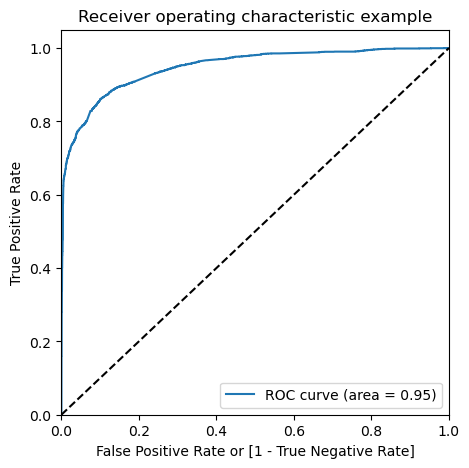

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False)
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Finding Optimal Cutoff Point

In [91]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.175688,1871,0,1,1,0,0,0,0,0,0,0,0
1,0,0.090104,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.206200,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.592084,8105,1,1,1,1,1,1,1,0,0,0,0
4,0,0.097066,3934,0,1,0,0,0,0,0,0,0,0,0


In [92]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.769171  0.961882  0.650425
0.2   0.2  0.859307  0.898621  0.835082
0.3   0.3  0.883426  0.863747  0.895552
0.4   0.4  0.886518  0.834550  0.918541
0.5   0.5  0.886209  0.786699  0.947526
0.6   0.6  0.883890  0.750608  0.966017
0.7   0.7  0.879716  0.719384  0.978511
0.8   0.8  0.875387  0.696675  0.985507
0.9   0.9  0.863482  0.656123  0.991254


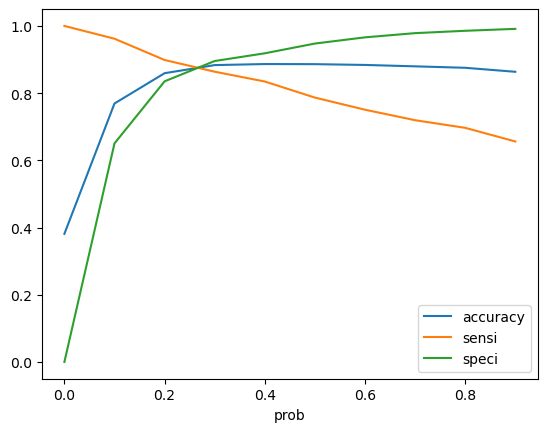

In [93]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.3  is the optimum point to take it as a cutoff probability.

In [94]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.175688,1871,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.090104,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.206200,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.592084,8105,1,1,1,1,1,1,1,0,0,0,0,1
4,0,0.097066,3934,0,1,0,0,0,0,0,0,0,0,0,0


Model Evaluation

In [95]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8761595547309833

In [96]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3489,  513],
       [ 288, 2178]], dtype=int64)

In [97]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negati

In [98]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8832116788321168

In [99]:
# Let us calculate specificity
TN / float(TN+FP)

0.8718140929535232

In [100]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12818590704647675


In [101]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8093645484949833


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9237490071485306


Precision and Recall

In [103]:
#Looking at the confusion matrix again

In [104]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3792,  210],
       [ 526, 1940]], dtype=int64)

Precision
TP / TP + FP

In [105]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9023255813953488

Recall
TP / TP + FN

In [106]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.786699107866991

Using sklearn utilities for the same

In [107]:
from sklearn.metrics import precision_score, recall_score
?precision_score

Signature:
precision_score(
    y_true,
    y_pred,
    *,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the precision.

The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
true positives and ``fp`` the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.

Parameters
----------
y_true : 1d array-like, or label indicator array / sparse matrix
    Ground truth (correct) target values.

y_pred : 1d array-like, or label indicator array / sparse matrix
    Estimated targets as returned by a classifier.

labels : array-like, default=None
    The set of labels to include when ``average != 'binary'``, and their
    order if ``average is None``. Labels present in the data can be
    exclud

In [108]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9023255813953488

In [109]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.786699107866991

In [110]:
from sklearn.metrics import precision_recall_curve

In [111]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

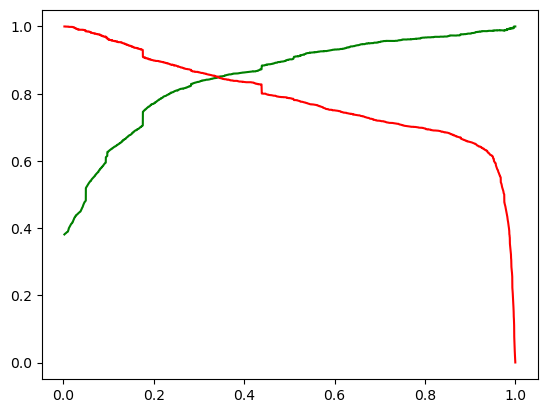

In [112]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

Making predictions on the test set

In [113]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                        'Total Time Spent on Website',
                                                                                                        'Page Views Per Visit']])

In [114]:
# Assigning the columns selected by the final model to the X_test 
X_test = X_test[col6]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Graduation in progress,Tags_Interested in other courses,Tags_UNKNOWN,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified
4269,0.964504,0,0,0,0,0,0,1,0,0,0,1,0,0
2376,-0.885371,0,1,0,0,0,0,1,0,0,0,0,0,0
7766,-0.777416,0,0,0,0,0,0,0,1,0,0,0,0,0
9199,-0.885371,0,0,1,0,0,0,0,0,0,0,1,0,1
4359,-0.885371,0,1,0,0,1,0,0,0,0,0,0,0,0


In [115]:
#adding constant 
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [116]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.670567
2376    0.993168
7766    0.942886
9199    0.049573
4359    0.975425
9186    0.984671
1631    0.973736
8963    0.951168
8007    0.018219
5324    0.965070
dtype: float64

In [117]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [118]:
# Let's see the head
y_pred_1.head()

,0
4269,0.670567
2376,0.993168
7766,0.942886
9199,0.049573
4359,0.975425


In [119]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [120]:
# Putting 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [121]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [122]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [123]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.670567
1,1,2376,0.993168
2,1,7766,0.942886
3,0,9199,0.049573
4,1,4359,0.975425


In [124]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [125]:
y_pred_final.head()

,Converted,Prospect ID,Converted_Prob
0,1,4269,0.670567
1,1,2376,0.993168
2,1,7766,0.942886
3,0,9199,0.049573
4,1,4359,0.975425


In [126]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_Prob']]

In [127]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.670567
1,2376,1,0.993168
2,7766,1,0.942886
3,9199,0,0.049573
4,4359,1,0.975425


In [128]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [129]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.670567,1
1,2376,1,0.993168,1
2,7766,1,0.942886,1
3,9199,0,0.049573,0
4,4359,1,0.975425,1


In [130]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8935786435786436

In [131]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1565,  112],
       [ 183,  912]], dtype=int64)

In [132]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8832116788321168

In [133]:
#Let us calculate specificity
TN / float(TN+FP)

0.8718140929535232

Observations:


Running the model on the test data
1. accuracy : 89.36 %
2. sensitivity : 88.32 %
3. specificity : 87.18 %

Running the model on the Train data

1. accuracy : 87.62 %
2. sensitivity : 88.32 %
3. specificity : 87.18 %

In [134]:
#assigning hot leads prediction scores to the Testing data 
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.670567,1,67
1,2376,1,0.993168,1,99
2,7766,1,0.942886,1,94
3,9199,0,0.049573,0,5
4,4359,1,0.975425,1,98


In [135]:
# Potential leads to be contcted and follow-ups
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]

In [136]:
res.params.sort_values(ascending=False)

Lead Source_Welingak Website                            4.354003
Last Notable Activity_Had a Phone Conversation          3.518481
const                                                   2.649043
Last Activity_SMS Sent                                  2.021298
Lead Origin_Lead Add Form                               1.212099
Last Activity_Form Submitted on Website                 1.068844
Total Time Spent on Website                             1.020128
What is your current occupation_Working Professional    0.947908
Lead Source_Olark Chat                                  0.928604
Last Activity_Email Opened                              0.723211
Last Notable Activity_Modified                         -0.684412
Lead Origin_Landing Page Submission                    -0.746945
Tags_UNKNOWN                                           -4.943507
Tags_Graduation in progress                            -5.095233
Tags_Interested in other courses                       -6.434808
dtype: float64